# SVM Classifier WBCD data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("wbcd.csv")

In [7]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  87139402         B        12.32         12.39           78.85      464.1   
1   8910251         B        10.60         18.95           69.28      346.4   
2    905520         B        11.04         16.83           70.92      373.2   
3    868871         B        11.28         13.39           73.00      384.8   
4   9012568         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0          0.10280           0.06981         0.03987      0.03700  ...   
1          0.09688           0.11470         0.06387      0.02642  ...   
2          0.10770           0.07804         0.03046      0.02480  ...   
3          0.11640           0.11360         0.04635      0.04796  ...   
4          0.07963           0.06934         0.03393      0.02657  ...   

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0         13.50          15.64            86.97       549.1            0.1385   
1         11.88          22.94            78.28       424.8            0.1213   
2         12.41          26.44            79.93       471.4            0.1369   
3         11.92          15.77            76.53       434.0            0.1367   
4         16.20          15.73           104.50       819.1            0.1126   

   compactness_worst  concavity_worst  points_worst  symmetry_worst  \
0             0.1266          0.12420       0.09391          0.2827   
1             0.2515          0.19160       0.07926          0.2940   
2             0.1482          0.10670       0.07431          0.2998   
3             0.1822          0.08669       0.08611          0.2102   
4             0.1737          0.13620       0.08178          0.2487   

   dimension_worst  
0          0.06771  
1          0.07587  
2          0.07881  
3          0.06784  
4          0.06766  

[5 rows x 32 columns]

In [12]:
df.corr()

id  radius_mean  texture_mean  perimeter_mean  \
id                 1.000000     0.074626      0.099770        0.073159   
radius_mean        0.074626     1.000000      0.323782        0.997855   
texture_mean       0.099770     0.323782      1.000000        0.329533   
perimeter_mean     0.073159     0.997855      0.329533        1.000000   
area_mean          0.096893     0.987357      0.321086        0.986507   
smoothness_mean   -0.012968     0.170581     -0.023389        0.207278   
compactness_mean   0.000096     0.506124      0.236702        0.556936   
concavity_mean     0.050080     0.676764      0.302418        0.716136   
points_mean        0.044158     0.822529      0.293464        0.850977   
symmetry_mean     -0.022114     0.147741      0.071401        0.183027   
dimension_mean    -0.052511    -0.311631     -0.076437       -0.261477   
radius_se          0.143048     0.679090      0.275869        0.691765   
texture_se        -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se       0.137331     0.674172      0.281673        0.693135   
area_se            0.177742     0.735864      0.259845        0.744983   
smoothness_se      0.096781    -0.222600      0.006614       -0.202694   
compactness_se     0.033961     0.206000      0.191975        0.250744   
concavity_se       0.055239     0.194204      0.143293        0.228082   
points_se          0.078768     0.376169      0.163851        0.407217   
symmetry_se       -0.017306    -0.104321      0.009127       -0.081629   
dimension_se       0.025725    -0.042641      0.054458       -0.005523   
radius_worst       0.082405     0.969539      0.352573        0.969476   
texture_worst      0.064720     0.297008      0.912045        0.303038   
perimeter_worst    0.079986     0.965137      0.358040        0.970387   
area_worst         0.107187     0.941082      0.343546        0.941550   
smoothness_worst   0.010338     0.119616      0.077503        0.150549   
compactness_worst -0.002968     0.413463      0.277830        0.455774   
concavity_worst    0.023203     0.526911      0.301025        0.563879   
points_worst       0.035174     0.744214      0.295316        0.771241   
symmetry_worst    -0.044224     0.163953      0.105008        0.189115   
dimension_worst   -0.029866     0.007066      0.119205        0.051019   

                   area_mean  smoothness_mean  compactness_mean  \
id                  0.096893        -0.012968          0.000096   
radius_mean         0.987357         0.170581          0.506124   
texture_mean        0.321086        -0.023389          0.236702   
perimeter_mean      0.986507         0.207278          0.556936   
area_mean           1.000000         0.177028          0.498502   
smoothness_mean     0.177028         1.000000          0.659123   
compactness_mean    0.498502         0.659123          1.000000   
concavity_mean      0.685983         0.521984          0.883121   
points_mean         0.823269         0.553695          0.831135   
symmetry_mean       0.151293         0.557775          0.602641   
dimension_mean     -0.283110         0.584792          0.565369   
radius_se           0.732562         0.301467          0.497473   
texture_se         -0.066280         0.068406          0.046205   
perimeter_se        0.726628         0.296092          0.548905   
area_se             0.800086         0.246552          0.455653   
smoothness_se      -0.166777         0.332375          0.135299   
compactness_se      0.212583         0.318943          0.738722   
concavity_se        0.207660         0.248396          0.570517   
points_se           0.372320         0.380676          0.642262   
symmetry_se        -0.072497         0.200774          0.229977   
dimension_se       -0.019887         0.283607          0.507318   
radius_worst        0.962746         0.213120          0.535315   
texture_worst       0.287489         0.036072          0.248133   
perimeter_worst     0.959120         0.238853   

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [15]:
df.shape

(569, 32)

In [16]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  points_mean  \
count       569.000000        569.000000      569.000000   569.000000   
mean          0.096360          0.104341        0.088799     0.048919   
std           0.014064          0.052813        0.079720     0.038803   
min           0.052630          0.019380        0.000000     0.000000   
25%           0.086370          0.064920        0.029560     0.020310   
50%           0.095870          0.092630        0.061540     0.033500   
75%           0.105300          0.130400        0.130700     0.074000   
max           0.163400          0.345400        0.426800     0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       points_worst  symmetry_worst  dimension_worst  
count    569.000000      569.000000       569.000000  
mean       0.114606        0.290076         0.083946  
std        0.065732        0.061867         0.018061  
min        0.000000        0.156500         0.055040  
25%        0.064930        0.250400         0.071460  
50%        0.099930        0.282200         0.080040  
75%        0.161400        0.317900         0.092080  
max        0.291000        0.663800         0.207500  

[8 rows x 31 columns]

In [17]:
round(df.describe(),2) # round up to 2 zeros

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
count  5.690000e+02       569.00        569.00          569.00     569.00   
mean   3.037183e+07        14.13         19.29           91.97     654.89   
std    1.250206e+08         3.52          4.30           24.30     351.91   
min    8.670000e+03         6.98          9.71           43.79     143.50   
25%    8.692180e+05        11.70         16.17           75.17     420.30   
50%    9.060240e+05        13.37         18.84           86.24     551.10   
75%    8.813129e+06        15.78         21.80          104.10     782.70   
max    9.113205e+08        28.11         39.28          188.50    2501.00   

       smoothness_mean  compactness_mean  concavity_mean  points_mean  \
count           569.00            569.00          569.00       569.00   
mean              0.10              0.10            0.09         0.05   
std               0.01              0.05            0.08         0.04   
min               0.05              0.02            0.00         0.00   
25%               0.09              0.06            0.03         0.02   
50%               0.10              0.09            0.06         0.03   
75%               0.11              0.13            0.13         0.07   
max               0.16              0.35            0.43         0.20   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count         569.00  ...        569.00         569.00           569.00   
mean            0.18  ...         16.27          25.68           107.26   
std             0.03  ...          4.83           6.15            33.60   
min             0.11  ...          7.93          12.02            50.41   
25%             0.16  ...         13.01          21.08            84.11   
50%             0.18  ...         14.97          25.41            97.66   
75%             0.20  ...         18.79          29.72           125.40   
max             0.30  ...         36.04          49.54           251.20   

       area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count      569.00            569.00             569.00           569.00   
mean       880.58              0.13               0.25             0.27   
std        569.36              0.02               0.16             0.21   
min        185.20              0.07               0.03             0.00   
25%        515.30              0.12               0.15             0.11   
50%        686.50              0.13               0.21             0.23   
75%       1084.00              0.15               0.34             0.38   
max       4254.00              0.22               1.06             1.25   

       points_worst  symmetry_worst  dimension_worst  
count        569.00          569.00           569.00  
mean           0.11            0.29             0.08  
std            0.07            0.06             0.02  
min            0.00            0.16             0.06  
25%            0.06            0.25             0.07  
50%            0.10            0.28             0.08  
75%            0.16            0.32             0.09  
max            0.29            0.66             0.21  

[8 rows x 31 columns]

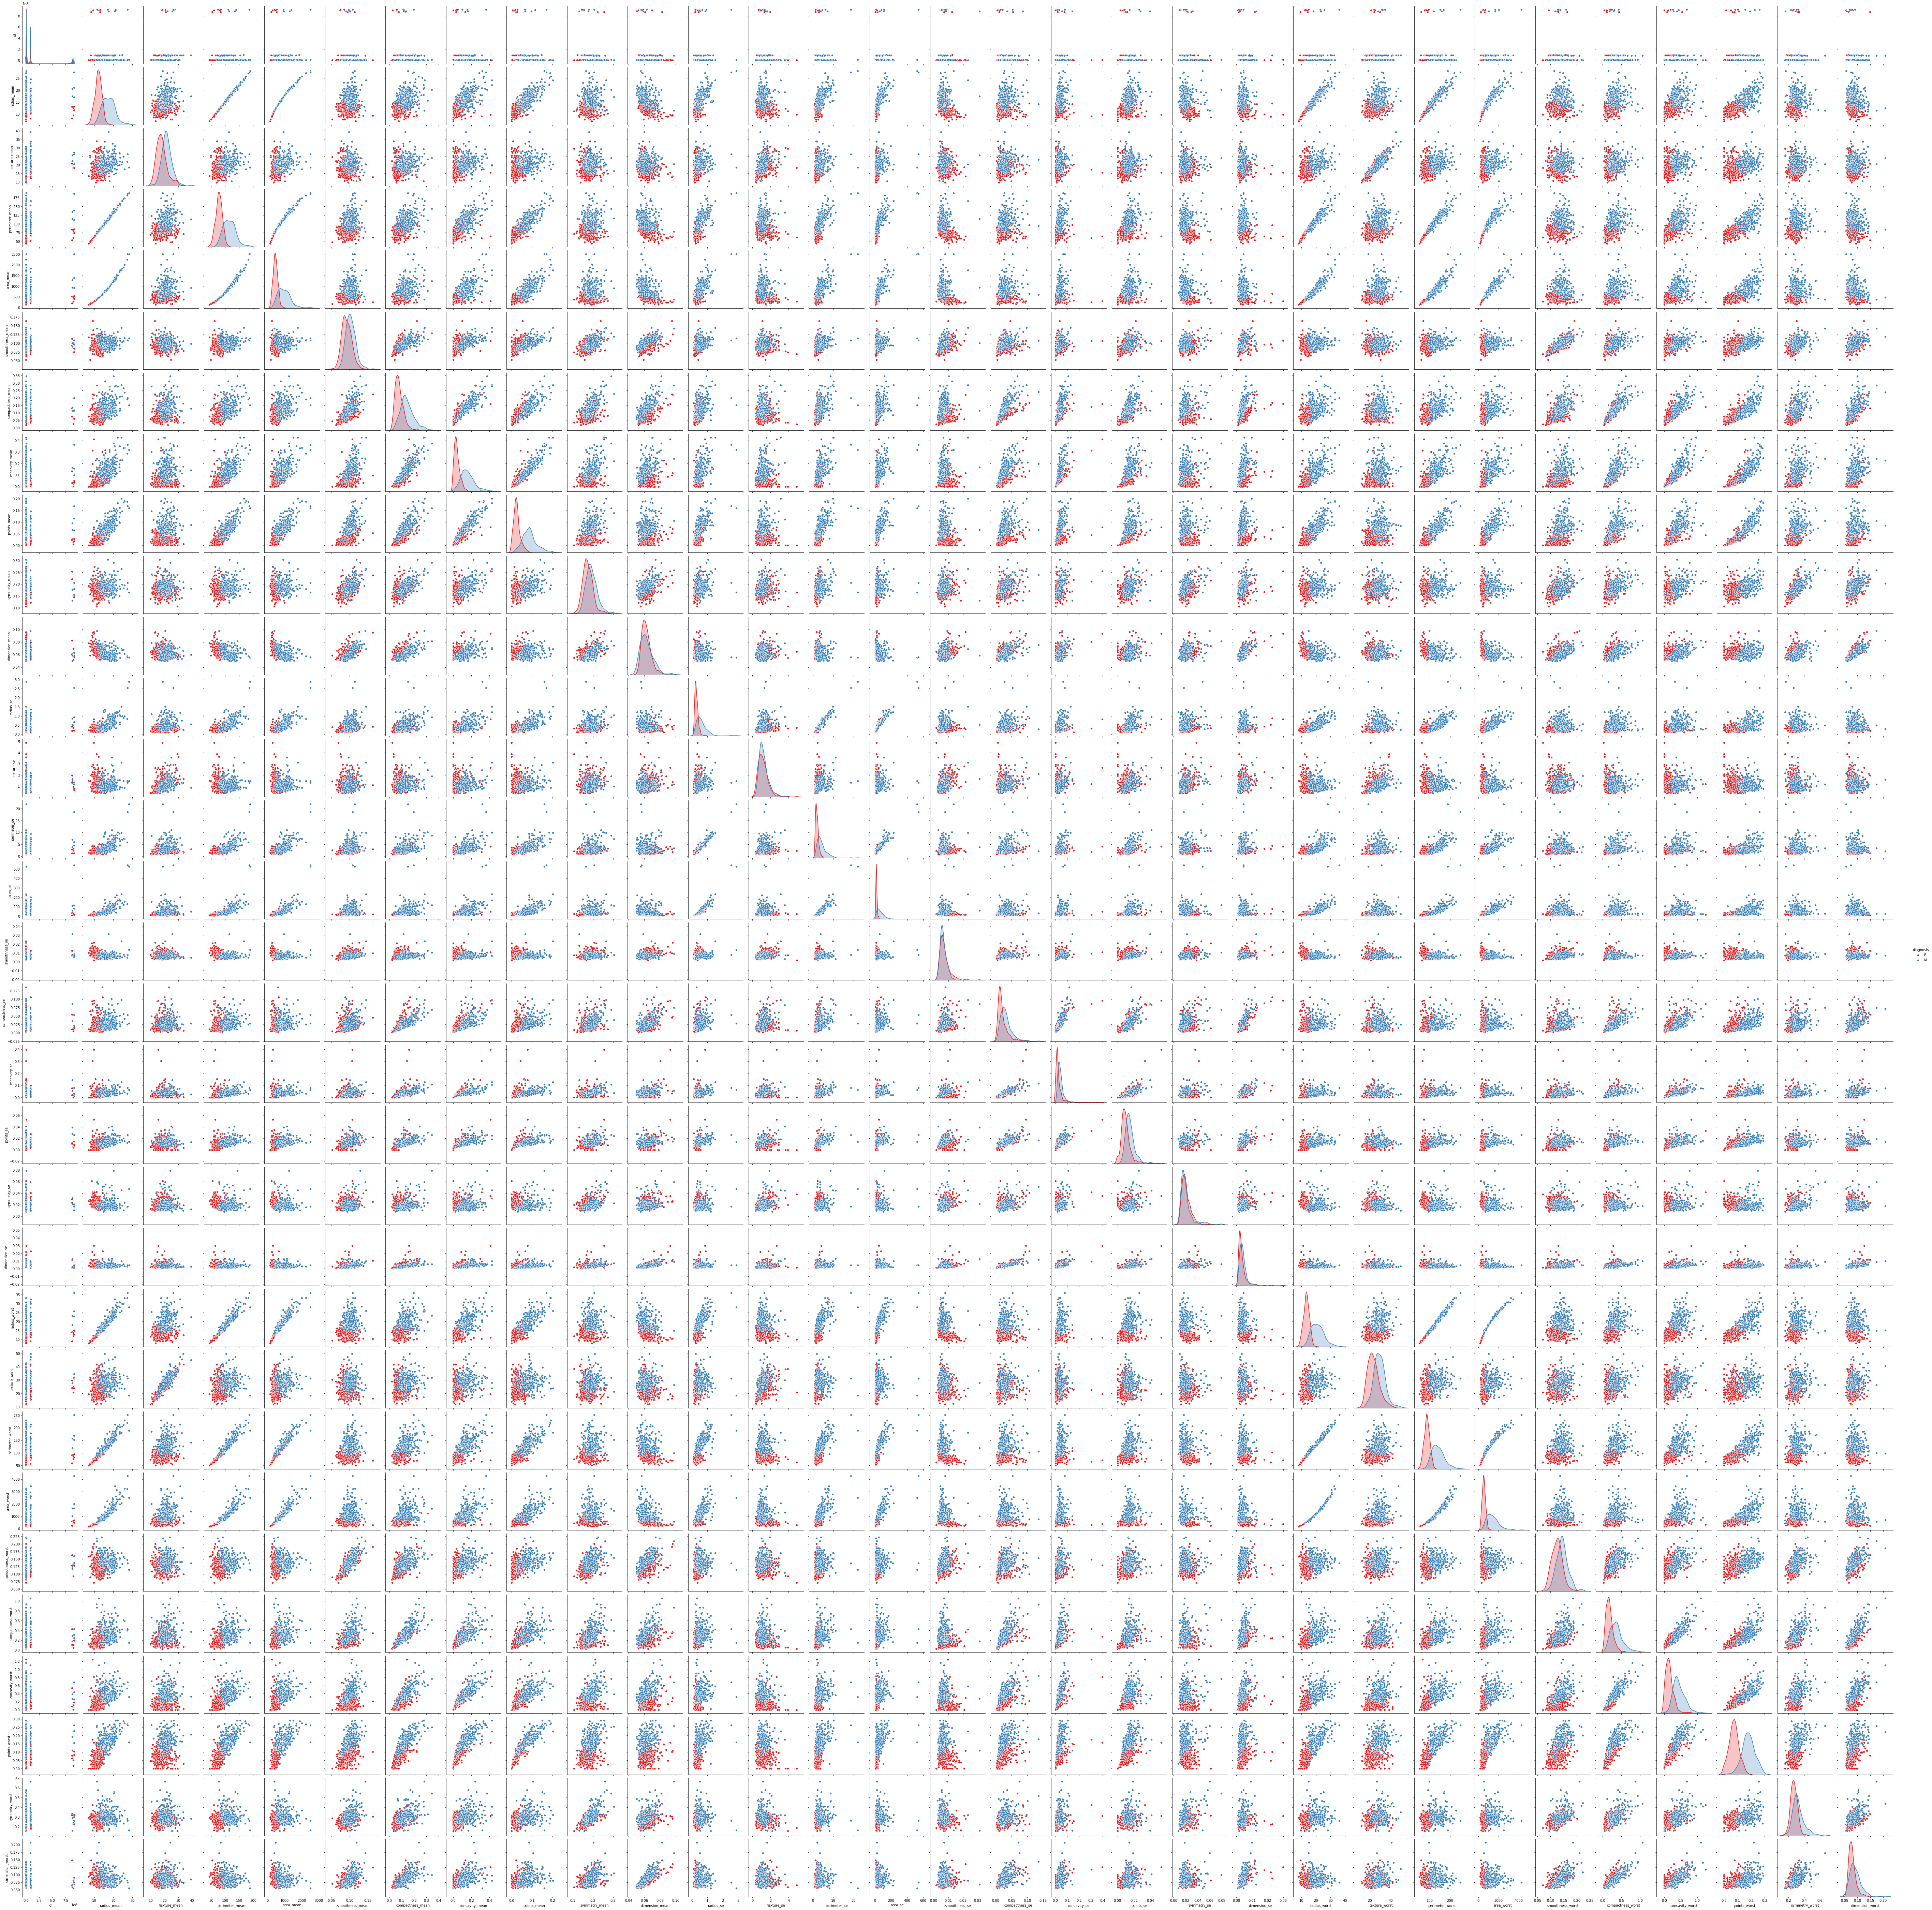

In [18]:
sns.pairplot(df,hue='diagnosis',palette='Set1')

In [19]:
df['diagnosis'].value_counts() # value count of target variable size 

B    357
M    212
Name: diagnosis, dtype: int64

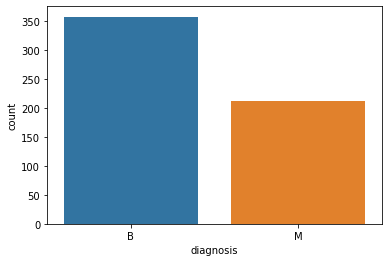

In [20]:
sns.countplot(data=df, x='diagnosis')

# lets Normalize our data Featurs Scalling of our data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(df.drop('diagnosis',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
scaled_features = scaler.transform(df.drop('diagnosis',axis=1))

In [29]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  0.454465  -0.513297    -1.605595     -0.540376       -0.542624   0.458285   
1 -0.171815  -1.001801    -0.079038     -0.934566       -0.877375   0.036986   
2 -0.235899  -0.876835    -0.572377     -0.867014       -0.801153   0.806996   
3 -0.236192  -0.808671    -1.372888     -0.781338       -0.768161   1.426135   
4 -0.170996   0.301824    -1.414775      0.234000        0.161860  -1.190618   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  ...  \
0        -0.654413         -0.614306       -0.307442     0.538081  ...   
1         0.196319         -0.312987       -0.580343     0.402996  ...   
2        -0.498443         -0.732448       -0.622129    -0.356400  ...   
3         0.175472         -0.532950       -0.024740    -0.148296  ...   
4        -0.663320         -0.688883       -0.576473    -0.330843  ...   

   dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  \
0     -0.573451     -1.634499      -0.604391        -0.582718    0.268776   
1     -0.908925     -0.445740      -0.863230        -0.801227   -0.485202   
2     -0.799171      0.124213      -0.814083        -0.719308    0.198638   
3     -0.900641     -1.613330      -0.915355        -0.785054    0.189871   
4     -0.014328     -1.619844      -0.082245        -0.108082   -0.866574   

   smoothness_worst  compactness_worst  concavity_worst  points_worst  \
0         -0.812128          -0.709978        -0.315133     -0.119321   
1         -0.017590          -0.386625        -0.538203      0.063489   
2         -0.674722          -0.793935        -0.613574      0.157320   
3         -0.458434          -0.889933        -0.433901     -1.292212   
4         -0.512506          -0.652408        -0.499832     -0.669366   

   symmetry_worst  
0       -0.899721  
1       -0.447528  
2       -0.284606  
3       -0.892517  
4       -0.902492  

[5 rows x 31 columns]

# Train test split

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
X = scaled_features
y = df['diagnosis']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# SVM Classifiers

In [33]:
#import SVC classifier
from sklearn.svm import SVC
#import metrics to compute accuracy
from sklearn.metrics import accuracy_score

In [34]:
#initiacte classifier
svc = SVC()

In [35]:
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction and Evaluation

In [36]:
predictions = svc.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,predictions))

[[119   2]
 [  1  66]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.99      0.98      0.99       121
           M       0.97      0.99      0.98        67

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [40]:
print('Model Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test,predictions))) # Accuracy predictions 

Model Accuracy Score: 0.9840


## Create Classification SVM classification linear object

SVM classifiction linear Kernel object

In [42]:
model_linear = SVC(kernel = "linear")

In [43]:
model_linear.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction and Evaluation

In [44]:
pred_test_linear = model_linear.predict(X_test)

In [45]:
np.mean(pred_test_linear==y_test) 

0.9840425531914894

# Kernel poly

In [46]:
model_poly = SVC(kernel = "poly")

In [47]:
model_poly.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Prediction and evaluation

In [48]:
pred_test_poly = model_poly.predict(X_test)

In [49]:
np.mean(pred_test_poly==y_test) 

0.925531914893617

# Kernel RBF

In [50]:
model_rbf = SVC(kernel = "rbf")

In [51]:
model_rbf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predicition and Evaluation

In [52]:
pred_test_rbf = model_rbf.predict(X_test)

In [53]:
np.mean(pred_test_rbf==y_test) 

0.9840425531914894

# Kernel Sigmoid

In [54]:
model_sig = SVC(kernel="sigmoid")

In [55]:
model_sig.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Predicition and Evaluation

In [56]:
pred_test_sig = model_sig.predict(X_test)

In [57]:
np.mean(pred_test_sig==y_test)

0.9787234042553191